In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [9]:
df=pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [10]:
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [11]:
df.shape

(1143, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [14]:
for i in df.columns:
    print(i,df[i].nunique())

fixed acidity 91
volatile acidity 135
citric acid 77
residual sugar 80
chlorides 131
free sulfur dioxide 53
total sulfur dioxide 138
density 388
pH 87
sulphates 89
alcohol 61
quality 6
Id 1143


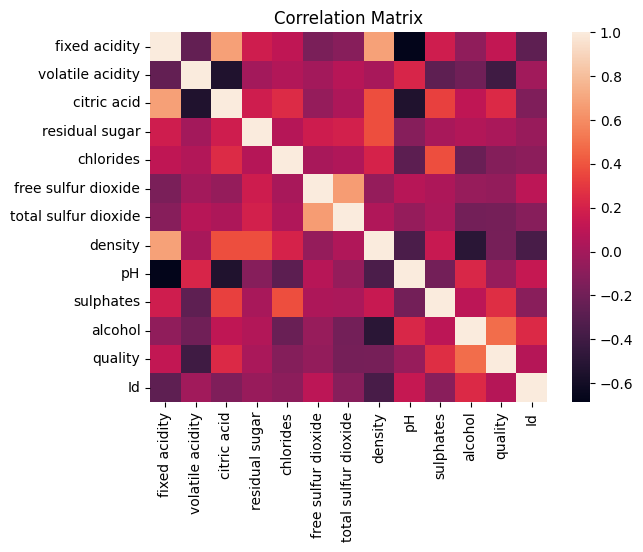

In [15]:
correlation_matrix = df.corr()

#plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

In [16]:
df['alcohol'] = np.log10(df['alcohol'])


<Axes: xlabel='alcohol', ylabel='Count'>

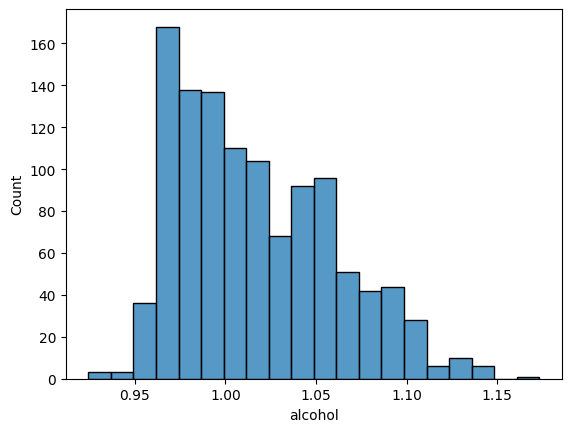

In [17]:
sns.histplot(data=df,x=df['alcohol'])


In [18]:
bins = np.arange(0.0, 2.0, 0.05)
df['alcohol']=pd.cut(df['alcohol'],bins=bins)
county_data=pd.get_dummies(df['alcohol'],prefix='alcohol').replace({False:0,True:1})
df=df.join(county_data)
df.drop('alcohol',axis=1,inplace=True)

<Axes: xlabel='volatile acidity', ylabel='Density'>

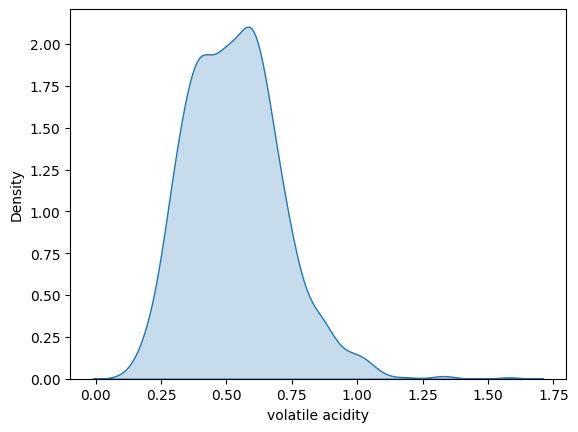

In [19]:
sns.kdeplot(data=df['volatile acidity'], shade=True)

In [20]:
df['volatile acidity'] = np.log(df['volatile acidity'])

<Axes: xlabel='volatile acidity', ylabel='Density'>

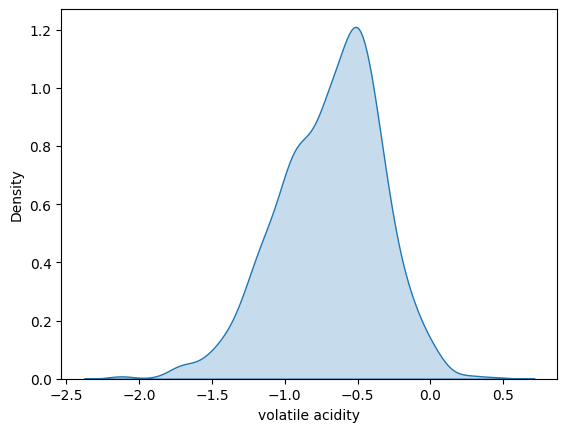

In [21]:
sns.kdeplot(data=df['volatile acidity'], shade=True)

In [22]:
bins=np.arange(-10, 2,-2)
df['volatile acidity']=pd.cut(df['volatile acidity'],bins=bins)
county_data=pd.get_dummies(df['volatile acidity'],prefix='volatile acidity').replace({False:0,True:1})
df=df.join(county_data)
df.drop('volatile acidity',axis=1,inplace=True)
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,...,"alcohol_(1.45, 1.5]","alcohol_(1.5, 1.55]","alcohol_(1.55, 1.6]","alcohol_(1.6, 1.65]","alcohol_(1.65, 1.7]","alcohol_(1.7, 1.75]","alcohol_(1.75, 1.8]","alcohol_(1.8, 1.85]","alcohol_(1.85, 1.9]","alcohol_(1.9, 1.95]"
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,...,0,0,0,0,0,0,0,0,0,0
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,...,0,0,0,0,0,0,0,0,0,0
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,...,0,0,0,0,0,0,0,0,0,0
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,...,0,0,0,0,0,0,0,0,0,0
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,6,...,0,0,0,0,0,0,0,0,0,0
1139,6.8,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,6,...,0,0,0,0,0,0,0,0,0,0
1140,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5,...,0,0,0,0,0,0,0,0,0,0
1141,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6,...,0,0,0,0,0,0,0,0,0,0


In [23]:
bins=[x for x in range(0,300,50)]
df['total sulfur dioxide']=pd.cut(df['total sulfur dioxide'],bins=bins)
county_data=pd.get_dummies(df['total sulfur dioxide'],prefix='total sulfur dioxide').replace({False:0,True:1})
df=df.join(county_data)
df.drop('total sulfur dioxide',axis=1,inplace=True)
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,quality,Id,...,"alcohol_(1.7, 1.75]","alcohol_(1.75, 1.8]","alcohol_(1.8, 1.85]","alcohol_(1.85, 1.9]","alcohol_(1.9, 1.95]","total sulfur dioxide_(0, 50]","total sulfur dioxide_(50, 100]","total sulfur dioxide_(100, 150]","total sulfur dioxide_(150, 200]","total sulfur dioxide_(200, 250]"
0,7.4,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,5,0,...,0,0,0,0,0,1,0,0,0,0
1,7.8,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,5,1,...,0,0,0,0,0,0,1,0,0,0
2,7.8,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,5,2,...,0,0,0,0,0,0,1,0,0,0
3,11.2,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,6,3,...,0,0,0,0,0,0,1,0,0,0
4,7.4,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,5,4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,6,1592,...,0,0,0,0,0,1,0,0,0,0
1139,6.8,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,6,1593,...,0,0,0,0,0,1,0,0,0,0
1140,6.2,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,5,1594,...,0,0,0,0,0,1,0,0,0,0
1141,5.9,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,6,1595,...,0,0,0,0,0,0,1,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop('quality',axis=1)
y=df.quality

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (914, 53)
X_test shape: (229, 53)
y_train shape: (914,)
y_test shape: (229,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor


In [28]:
steps=[('ss',StandardScaler()),('lR',LinearRegression())]
steps1=[('dt',DecisionTreeRegressor(random_state=42, max_depth=10,min_samples_split=1.0))]
steps2=[('ss',StandardScaler()),('knn',KNeighborsRegressor(n_neighbors=30))]
steps3=[('ss',StandardScaler()),('lasso',Lasso(alpha=1.0))]
steps4=[('ss',StandardScaler()),('ridge',Ridge(alpha=1.0))]
steps5=[('ss',StandardScaler()),('rf_cregressor',RandomForestRegressor(n_estimators=100, random_state=42))]

In [29]:
pipe1=Pipeline(steps)
pipe2=Pipeline(steps=steps1)
pipe3=Pipeline(steps=steps2)
pipe4=Pipeline(steps=steps3)
pipe5=Pipeline(steps=steps4)
pipe6=Pipeline(steps=steps5)

In [30]:
pipe1.fit(X_train,y_train)


Pipeline(steps=[('ss', StandardScaler()), ('lR', LinearRegression())])

In [31]:
pipe2.fit(X_train,y_train)


Pipeline(steps=[('dt',
                 DecisionTreeRegressor(max_depth=10, min_samples_split=1.0,
                                       random_state=42))])

In [32]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=30))])

In [33]:
pipe4.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lasso', Lasso())])

In [34]:
pipe5.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('ridge', Ridge())])

In [35]:
pipe6.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('rf_cregressor', RandomForestRegressor(random_state=42))])

In [36]:
linear = pipe1.predict(X_test)


In [37]:
decisiontree = pipe2.predict(X_test)

In [38]:
knn = pipe3.predict(X_test)

In [39]:
lasso = pipe4.predict(X_test)

In [40]:
ridge = pipe5.predict(X_test)


In [41]:
random= pipe6.predict(X_test)

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_linear_regression = r2_score(y_test, linear)
print("R-squared for Linear Regression:", r2_linear_regression)

R-squared for Linear Regression: 0.3581705911758106


In [44]:
r2_decision_tree = r2_score(y_test, decisiontree)
print("R-squared for Decision Tree:", r2_decision_tree)

R-squared for Decision Tree: 0.0754741377646051


In [45]:
r2_knn = r2_score(y_test, knn)
print("R-squared for KNN:", r2_knn)

R-squared for KNN: 0.41510562066418455


In [46]:
lasso= r2_score(y_test, lasso)
print("R-squared for lasso:", lasso)

R-squared for lasso: -1.5464265512799003e-05


In [47]:
ridge = r2_score(y_test, ridge)
print("R-squared for ridge:", ridge)

R-squared for ridge: 0.3586018003495729


In [48]:
random = r2_score(y_test, random)
print("R-squared for random forest:", random)

R-squared for random forest: 0.4381119080254955
